In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def plotting_hull(points, convex_hull):
    """
    Scatterplot of points and convex hull
    
    Parameters
    ----------
    points : pd.DataFrame
        DataFrame with x and y coordinates for all points
    convex_hull : pd.DataFrame
        DataFrame with x and y coordinates for all points \
        belonging to the convex hull
    """
    plt.figure(figsize=(10,6))
    plt.scatter(data=points,
                x='x',
                y='y',
                color='white',
                linewidth=1,
                edgecolors='black',
                label='Inner points')
    plt.scatter(data=convex_hull,
                x='x',
                y='y',
                s=50,
                color='black',
                label='Convex hull points')
    plt.plot(convex_hull.x, convex_hull.y, color='black', label='Convex hull')
    plt.legend()
    plt.show()

In [12]:
def cross_product(o, a, b):
    """
    Comput the cross product of  position of B compared to OA.
    Returns True if OA and OB form a positive angle
    
    Parameters 
    ----------
    o : pd.Series
        Coordinates ('x', 'y') of point in hull
    a : pd.Series
        Coordinates('x', 'y') of current end_point
    b : pd.Pandas
        Tuple ('x', 'y') of considered point
    """
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

In [13]:
def jarvis_march(points):
    """
    Compute the convex hull of 2-dimension points
    
    Parameters
    ----------
    points : pd.DataFrame
        DataFrame with x and y coordinates for each point.
    """
    
    # leftmost point is in the convex hull set
    leftmost_point_index = points.x.idxmin() 
    point_on_hull = points.loc[leftmost_point_index] 
    
    # next point randomly selected
    end_point = points.loc[(leftmost_point_index + 1) % len(points)] 
    
    # initializing convex hull dataframe
    convex_hull = pd.DataFrame(
        data=[point_on_hull], 
        columns=points.columns) # dataframe containing convex hull set
    
    # while the convex hull is not fully determined
    while not np.all(point_on_hull == end_point):
        for p in points.itertuples(index=False):
            # checks the position of p relative to (point_on_hull, end_point)
            if cross_product(point_on_hull, end_point, p) < 0: 
                end_point = p # new end point if negative

        # updating points to consider
        point_on_hull = end_point
        end_point = convex_hull.iloc[0]
        
        # appending point to convex_hull set
        convex_hull = convex_hull.append(
            pd.DataFrame([point_on_hull], columns=convex_hull.columns), 
            ignore_index=True)
    
    # scatterplot of dataset and convex hull
    plotting_hull(points, convex_hull)

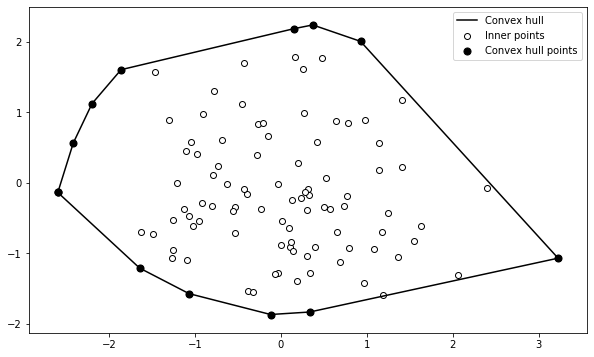

In [14]:
points = pd.DataFrame(np.random.normal(size=(100, 2)), columns=['x', 'y'])
jarvis_march(points)